In [ ]:
#Feature Engineering for Machine Learning in Python
## 1. Creating Features
## 2. Dealing with Messy Data
## 3. Conforming to Statistical Assumptions
## 4. Dealing with Text Data

## 1. Creating Features

In [19]:
# Why generate features?

# Getting to know your data

so_survey_csv = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/Combined_DS_v10.csv'

# Import pandas
import pandas as pd

# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv(so_survey_csv)

# Print the first five rows of the DataFrame
print(so_survey_df.head())

# Print the data type of each column
print(so_survey_df.dtypes)

      SurveyDate  ...   RawSalary
0  2/28/18 20:20  ...         NaN
1  6/28/18 13:26  ...   70,841.00
2    6/6/18 3:37  ...         NaN
3    5/9/18 1:06  ...   21,426.00
4  4/12/18 22:41  ...  £41,671.00

[5 rows x 11 columns]
SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object


**Getting to know your data**

Pandas is one the most popular packages used to work with tabular data in Python. It is generally imported using the alias pd and can be used to load a CSV (or other delimited files) using read_csv().

You will be working with a modified subset of the Stackoverflow survey response data in the first three chapters of this course. This data set records the details, and preferences of thousands of users of the StackOverflow website.

**Question**

What type of data is the ConvertedSalary column?

**Possible Answers**

- [ ] Datetime
- [x] Numeric
- [ ] String
- [ ] Boolean

In [21]:
# Selecting specific data types

import pandas as pd
so_survey_csv = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/Combined_DS_v10.csv'
so_survey_df = pd.read_csv(so_survey_csv)

# Create subset of only the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=['int', 'float'])

# Print the column names contained in so_survey_df_num
print(so_numeric_df.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


In [11]:
# Dealing with categorical features

# One-hot encoding and dummy variables

import pandas as pd
so_survey_csv = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/Combined_DS_v10.csv'
so_survey_df = pd.read_csv(so_survey_csv)

# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded = pd.get_dummies(so_survey_df, columns=['Country'], prefix='OH')

# Print the columns names
print(one_hot_encoded.columns)

# Create dummy variables for the Country column
dummy = pd.get_dummies(so_survey_df, columns=['Country'], drop_first=True, prefix='DM')

# Print the columns names
print(dummy.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Ireland', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA', 'OH_Ukraine'],
      dtype='object')
Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
       'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK',
       'DM_USA', 'DM_Ukraine'],
      dtype='object')


In [22]:
# Dealing with uncommon categories

import pandas as pd
so_survey_csv = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/Combined_DS_v10.csv'
so_survey_df = pd.read_csv(so_survey_csv)

# Create a series out of the Country column
countries = so_survey_df['Country']

# Get the counts of each category
country_counts = countries.value_counts()

# Print the count values for each category
print(country_counts)

# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts < 10].index)

# Print the top 5 rows in the mask series
print(mask.head())

# Label all other categories as Other
countries[mask] = 'Other'

# Print the updated category counts
print(pd.value_counts(countries))

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
Ukraine           9
Ireland           5
Name: Country, dtype: int64
0    False
1    False
2    False
3    False
4    False
Name: Country, dtype: bool
South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
Other            14
Name: Country, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
# Numeric variables

# Binarizing columns

import pandas as pd
so_survey_csv = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/Combined_DS_v10.csv'
so_survey_df = pd.read_csv(so_survey_csv)
so_survey_df['ConvertedSalary'] = so_survey_df['ConvertedSalary'].fillna(0)

# Create the Paid_Job column filled with zeros
so_survey_df['Paid_Job'] = 0

# Replace all the Paid_Job values where ConvertedSalary is > 0
so_survey_df.loc[so_survey_df['ConvertedSalary'] > 0, 'Paid_Job'] = 1

# Print the first five rows of the columns
print(so_survey_df[['Paid_Job', 'ConvertedSalary']].head())

   Paid_Job  ConvertedSalary
0         0              0.0
1         1          70841.0
2         0              0.0
3         1          21426.0
4         1          41671.0


In [33]:
# Binning values

# Bin the continuous variable ConvertedSalary into 5 bins
so_survey_df['equal_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 5)

# Print the first 5 rows of the equal_binned column
print(so_survey_df[['equal_binned', 'ConvertedSalary']].head())

# Import numpy
import numpy as np

# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable ConvertedSalary using these boundaries
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 
                                         bins, labels = labels)

# Print the first 5 rows of the boundary_binned column
print(so_survey_df[['boundary_binned', 'ConvertedSalary']].head())

          equal_binned  ConvertedSalary
0  (-2000.0, 400000.0]              0.0
1  (-2000.0, 400000.0]          70841.0
2  (-2000.0, 400000.0]              0.0
3  (-2000.0, 400000.0]          21426.0
4  (-2000.0, 400000.0]          41671.0
  boundary_binned  ConvertedSalary
0        Very low              0.0
1          Medium          70841.0
2        Very low              0.0
3             Low          21426.0
4             Low          41671.0


## 2. Dealing with Messy Data

In [52]:
# Why do missing values exist?

# How sparse is my data?

import pandas as pd
so_survey_csv = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/Combined_DS_v10.csv'
so_survey_df = pd.read_csv(so_survey_csv)

# Subset the DataFrame
sub_df = so_survey_df[['Age', 'Gender']]

# Print the number of non-missing values
print(sub_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     999 non-null    int64 
 1   Gender  693 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


**Question**

Based on the results, how many non-missing entries are there in the Gender column?

**Possible Answers**

- [ ] 999
- [x] 693

In [53]:
# Finding the missing values

print(sub_df.head(10))

# Print the locations of the missing values
print(sub_df.head(10).isnull())

# Print the locations of the non-missing values
print(sub_df.head(10).notnull())

   Age  Gender
0   21    Male
1   38    Male
2   45     NaN
3   46    Male
4   39    Male
5   39    Male
6   34    Male
7   24  Female
8   23    Male
9   36     NaN
     Age  Gender
0  False   False
1  False   False
2  False    True
3  False   False
4  False   False
5  False   False
6  False   False
7  False   False
8  False   False
9  False    True
    Age  Gender
0  True    True
1  True    True
2  True   False
3  True    True
4  True    True
5  True    True
6  True    True
7  True    True
8  True    True
9  True   False


In [54]:
# Dealing with missing values (I)

# Print the number of rows and columns
print(so_survey_df.shape)

# Create a new DataFrame dropping all incomplete rows
no_missing_values_rows = so_survey_df.dropna(how='any')

# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)

# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(how='any', axis=1)

# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)

# Drop all rows where Gender is missing
no_gender = so_survey_df.dropna(subset=['Gender'])

# Print the shape of the new DataFrame
print(no_gender.shape)

(999, 11)
(264, 11)
(999, 7)
(693, 11)


In [55]:
# Replacing missing values with constants

# Replace missing values
so_survey_df['Gender'].fillna(value='Not Given', inplace=True)

# Print the count of each value
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Transgender                                                                    2
Female;Male                                                                    2
Male;Non-binary. genderqueer. or gender non-conforming                         1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Name: Gender, dtype: int64


In [56]:
# Dealing with missing values (II)

# Filling continuous missing values

# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Round the StackOverflowJobsRecommend values
so_survey_df['StackOverflowJobsRecommend'] = round(so_survey_df['StackOverflowJobsRecommend'])

# Print the top 5 rows
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


**Imputing values in predictive models**

When working with predictive models you will often have a separate train and test DataFrames. In these cases you want to ensure no information from your test set leaks into your train set. 

When filling missing values in data to be used in these situations how should approach the two data sets?

**Possible Answers**

- [ ] Only fill the train set.
- [ ] Only fill the test set.
- [x] Apply the measures of central tendency (mean/median etc.) calculated on the train set to both the train and test sets.
- [ ] Apply the measures of central tendency (mean/median etc.) calculated on the test set to both the train and test sets.
- [ ] Apply the measures of central tendency (mean/median etc.) calculated on the train set to the train set, and the measures calculated on the test set, to the test set.

In [57]:
# Dealing with other data issues

# Dealing with stray characters (I)

so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '')
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')

In [58]:
# Dealing with stray characters (II)

so_survey_df_copy = so_survey_df.copy()

# Attempt to convert the column to numeric values
numeric_vals = pd.to_numeric(so_survey_df['RawSalary'], errors='coerce')

# Find the indexes of missing values
idx = numeric_vals.isna()

# Print the relevant rows
print(so_survey_df['RawSalary'][idx])

# Replace the offending characters
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£', '')

# Convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype('float')

# Print the column
print(so_survey_df['RawSalary'])

0            NaN
2            NaN
4      £41671.00
6            NaN
8            NaN
         ...    
989          NaN
990          NaN
992          NaN
994          NaN
997          NaN
Name: RawSalary, Length: 401, dtype: object
0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64


In [59]:
# Method chaining

so_survey_df = so_survey_df_copy.copy()

# Use method chaining
so_survey_df['RawSalary'] = so_survey_df['RawSalary']\
                              .str.replace(',', '')\
                              .str.replace('$', '')\
                              .str.replace('£', '')\
                              .astype('float')
 
# Print the RawSalary column
print(so_survey_df['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64


## 3. Conforming to Statistical Assumptions

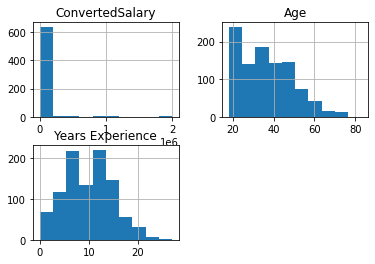

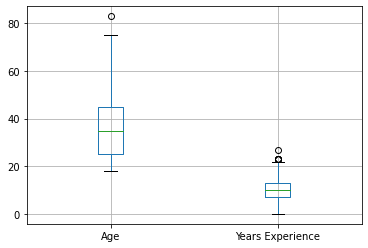

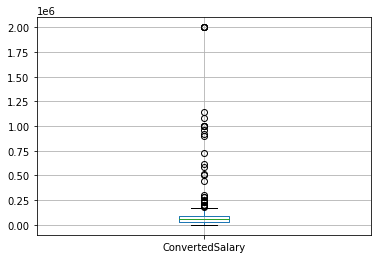

In [110]:
# Data distributions

# What does your data look like? (I)

import matplotlib.pyplot as plt
so_numeric_df = so_survey_df[['ConvertedSalary', 'Age', 'Years Experience']]

# Create a histogram
so_numeric_df.hist()
plt.show()

# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

# Create a boxplot of ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

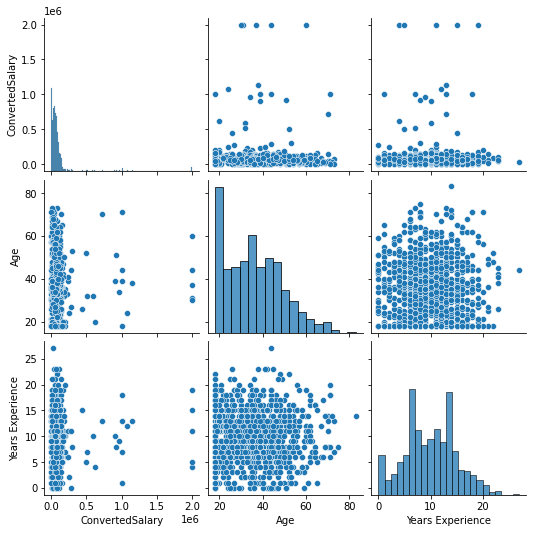

       ConvertedSalary         Age  Years Experience
count     6.650000e+02  999.000000        999.000000
mean      9.256517e+04   36.003003          9.961962
std       2.091344e+05   13.255127          4.878129
min       0.000000e+00   18.000000          0.000000
25%       2.755000e+04   25.000000          7.000000
50%       5.556200e+04   35.000000         10.000000
75%       8.823800e+04   45.000000         13.000000
max       2.000000e+06   83.000000         27.000000


In [111]:
# What does your data look like? (II)

# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Plot pairwise relationships
sns.pairplot(so_numeric_df)

# Show plot
plt.show()

# Print summary statistics
print(so_numeric_df.describe())

**When don't you have to transform your data?**

While making sure that all of your data is on the same scale is advisable for most analyses, for which of the following machine learning models is normalizing data not always necessary?

**Possible Answers**

- [ ] K-Means
- [x] Decision Trees
- [ ] Linear Regression
- [ ] K-nearest neighbors



In [112]:
# Scaling and transformations

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_MM', 'Age']].head())

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [113]:
# Standardization

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_SS', 'Age']].head())

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


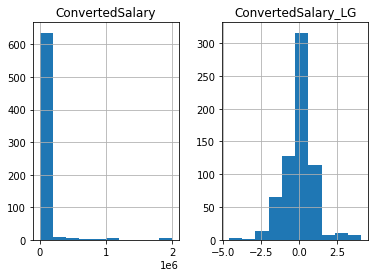

In [114]:
# Log transformation

# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

**When can you use normalization?**

When could you use normalization (MinMaxScaler) when working with a dataset?

**Possible Answers**

- [ ] When you know that your data may have outliers.
- [x] When you know the the data has a strict upper and lower bound.
- [ ] When you know that your test data may contain smaller values than your training data.
- [ ] When you know that your test data may contain larger values than your training data.

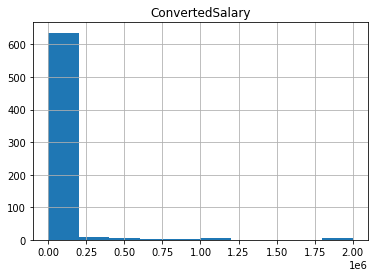

<Figure size 432x288 with 0 Axes>

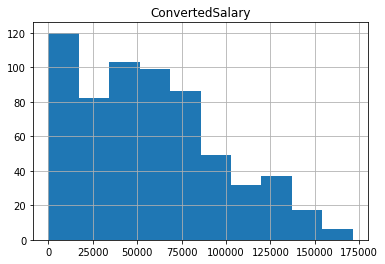

In [115]:
# Removing outliers

# Percentage based outlier removal

# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

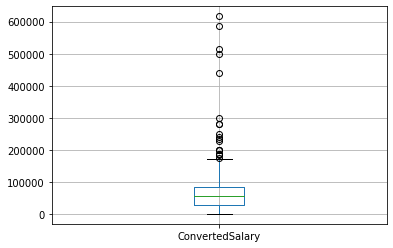

In [116]:
# Statistical outlier removal

# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) \
                           & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

In [117]:
# Scaling and transforming new data

# Train and testing transformations (I)

so_train_numeric = so_numeric_df[['ConvertedSalary', 'Age', 'Years Experience', 'Age_SS']]
so_train_numeric = so_numeric_df.iloc[700:,:] 

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])
print(so_test_numeric[['Age', 'Age_ss']].head())

     Age    Age_ss
700   35 -0.091193
701   18 -1.396916
702   47  0.830495
703   57  1.598567
704   41  0.369651


In [118]:
# Train and testing transformations (II)

so_train_numeric = so_numeric_df[['ConvertedSalary', 'Age', 'Years Experience']]
so_train_numeric = so_train_numeric.iloc[0:700,:] 

so_test_numeric = so_numeric_df[['ConvertedSalary', 'Age', 'Years Experience']]
so_test_numeric = so_test_numeric.iloc[700:,:] 

train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]   

,ConvertedSalary,Age,Years Experience
700,36716.0,35,13
701,200000.0,18,20
703,10476.0,57,19
707,42672.0,29,9
708,23614.0,46,15
...,...,...,...
988,50448.0,18,4
991,55562.0,34,1
993,30000.0,28,5
995,58746.0,27,16


## 4. Dealing with Text Data

In [121]:
# Encoding text

import pandas as pd
filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/inaugural_speeches.csv'
speech_df = pd.read_csv(filename)

# Cleaning up your text

# Print the first 5 rows of the text column
print(speech_df['text'].head())

# Replace all non letter characters with a whitespace
speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

# Change to lower case
speech_df['text_clean'] = speech_df['text_clean'].str.lower()

# Print the first 5 rows of the text_clean column
print(speech_df['text_clean'].head())

0    Fellow-Citizens of the Senate and of the House...
1    Fellow Citizens:  I AM again called upon by th...
2    WHEN it was first perceived, in early times, t...
3    Friends and Fellow-Citizens:  CALLED upon to u...
4    PROCEEDING, fellow-citizens, to that qualifica...
Name: text, dtype: object
0    fellow citizens of the senate and of the house...
1    fellow citizens   i am again called upon by th...
2    when it was first perceived  in early times  t...
3    friends and fellow citizens   called upon to u...
4    proceeding  fellow citizens  to that qualifica...
Name: text_clean, dtype: object


In [122]:
# High level text features

# Find the length of each text
speech_df['char_cnt'] = speech_df['text_clean'].str.len()

# Count the number of words in each text
speech_df['word_cnt'] = speech_df['text_clean'].str.split().str.len()

# Find the average length of word
speech_df['avg_word_length'] = speech_df['char_cnt'] / speech_df['word_cnt']

# Print the first 5 rows of these columns
print(speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']])

                                           text_clean  ...  avg_word_length
0   fellow citizens of the senate and of the house...  ...         6.016760
1   fellow citizens   i am again called upon by th...  ...         5.829630
2   when it was first perceived  in early times  t...  ...         5.971158
3   friends and fellow citizens   called upon to u...  ...         5.843318
4   proceeding  fellow citizens  to that qualifica...  ...         5.948363
5   unwilling to depart from examples of the most ...  ...         5.939779
6   about to add the solemnity of an oath to the o...  ...         5.902560
7   i should be destitute of feeling if i was not ...  ...         5.882318
8   fellow citizens   i shall not attempt to descr...  ...         5.893865
9   in compliance with an usage coeval with the ex...  ...         6.075633
10  fellow citizens   about to undertake the arduo...  ...         6.033628
11  fellow citizens   the will of the american peo...  ...         5.988974
12  fellow c

In [124]:
# Word counts

# Counting words (I)

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer
cv = CountVectorizer()

# Fit the vectorizer
cv.fit(speech_df['text_clean'])

# Print feature names
print(cv.get_feature_names())

['abandon', 'abandoned', 'abandonment', 'abate', 'abdicated', 'abeyance', 'abhorring', 'abide', 'abiding', 'abilities', 'ability', 'abject', 'able', 'ably', 'abnormal', 'abode', 'abolish', 'abolished', 'abolishing', 'aboriginal', 'aborigines', 'abound', 'abounding', 'abounds', 'about', 'above', 'abraham', 'abreast', 'abridging', 'abroad', 'absence', 'absent', 'absolute', 'absolutely', 'absolutism', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'abstain', 'abstaining', 'abstract', 'abstractions', 'absurd', 'abundance', 'abundant', 'abundantly', 'abuse', 'abused', 'abuses', 'academies', 'accept', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accession', 'accident', 'accidental', 'accidents', 'acclaim', 'accommodation', 'accommodations', 'accompanied', 'accompany', 'accomplish', 'accomplished', 'accomplishing', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'accorded', 'according', 'accordingly', 'accords', 'account', 'accountability', 'accountab

In [126]:
# Counting words (II)

# Apply the vectorizer
cv_transformed = cv.transform(speech_df['text_clean'])

# Print the full array
cv_array = cv_transformed.toarray()
print(cv_array)

# Print the shape of cv_array
print(cv_array.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(58, 9043)


In [127]:
# Limiting your features

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Specify arguements to limit the number of features generated
cv = CountVectorizer(min_df= 0.2, max_df = 0.8)

# Fit, transform, and convert into array
cv_transformed = cv.fit_transform(speech_df['text_clean'])
cv_array = cv_transformed.toarray()

# Print the array shape
print(cv_array.shape)

(58, 818)


In [128]:
# Text to DataFrame

# Create a DataFrame with these features
cv_df = pd.DataFrame(cv_array, 
                     columns=cv.get_feature_names()).add_prefix('Counts_')

# Add the new columns to the original DataFrame
speech_df_new = pd.concat([speech_df, cv_df], axis=1, sort=False)
print(speech_df_new.head())

                Name         Inaugural Address  ... Counts_young Counts_your
0  George Washington   First Inaugural Address  ...            0           9
1  George Washington  Second Inaugural Address  ...            0           1
2         John Adams         Inaugural Address  ...            0           1
3   Thomas Jefferson   First Inaugural Address  ...            0           7
4   Thomas Jefferson  Second Inaugural Address  ...            0           4

[5 rows x 826 columns]


In [129]:
# Term frequency-inverse document frequency

# Tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features = 100, stop_words = 'english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(tv_df.head())

   TFIDF_action  TFIDF_administration  ...  TFIDF_world  TFIDF_years
0      0.000000              0.133415  ...     0.045929     0.052694
1      0.000000              0.261016  ...     0.000000     0.000000
2      0.000000              0.092436  ...     0.063643     0.073018
3      0.000000              0.092693  ...     0.095729     0.000000
4      0.041334              0.039761  ...     0.054752     0.062817

[5 rows x 100 columns]


In [130]:
# Inspecting Tf-idf values

# Isolate the row to be examined
sample_row = tv_df.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

TFIDF_government    0.367430
TFIDF_public        0.333237
TFIDF_present       0.315182
TFIDF_duty          0.238637
TFIDF_citizens      0.229644
Name: 0, dtype: float64


In [137]:
# Transforming unseen data

train_speech_df = speech_df.copy()
train_speech_df = train_speech_df.iloc[0:45,:] 

test_speech_df = speech_df.copy()
test_speech_df = test_speech_df.iloc[45:,:] 

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(train_speech_df['text_clean'])

# Transform test data
test_tv_transformed = tv.transform(test_speech_df['text_clean'])

# Create new features for the test set
test_tv_df = pd.DataFrame(test_tv_transformed.toarray(), 
                          columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(test_tv_df.head())

   TFIDF_action  TFIDF_administration  ...  TFIDF_world  TFIDF_years
0      0.000000              0.029540  ...     0.299983     0.134749
1      0.000000              0.000000  ...     0.277701     0.126126
2      0.000000              0.000000  ...     0.225452     0.043884
3      0.037094              0.067428  ...     0.237026     0.061516
4      0.000000              0.000000  ...     0.299701     0.153133

[5 rows x 100 columns]


In [138]:
# N-grams

# Using longer n-grams

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, stop_words='english', ngram_range = (3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(speech_df['text_clean'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())

['ability preserve protect', 'agriculture commerce manufactures', 'america ideal freedom', 'amity mutual concession', 'anchor peace home', 'ask bow heads', 'best ability preserve', 'best interests country', 'bless god bless', 'bless united states', 'chief justice mr', 'children children children', 'citizens united states', 'civil religious liberty', 'civil service reform', 'commerce united states', 'confidence fellow citizens', 'congress extraordinary session', 'constitution does expressly', 'constitution united states', 'coordinate branches government', 'day task people', 'defend constitution united', 'distinction powers granted', 'distinguished guests fellow', 'does expressly say', 'equal exact justice', 'era good feeling', 'executive branch government', 'faithfully execute office', 'fellow citizens assembled', 'fellow citizens called', 'fellow citizens large', 'fellow citizens world', 'form perfect union', 'general welfare secure', 'god bless america', 'god bless god', 'good greates

In [139]:
# Finding the most common words

# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                 columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head())

Counts_constitution united states    20
Counts_people united states          13
Counts_preserve protect defend       10
Counts_mr chief justice              10
Counts_president united states        8
dtype: int64
